C:\Users\bryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🔹 Iniciando entrenamiento del modelo...

✅ Modelo entrenado exitosamente!

=== PREDICCIONES ===

Cigarros por día:  0 → Riesgo estimado: 8.91
Cigarros por día: 10 → Riesgo estimado: 33.26
Cigarros por día: 20 → Riesgo estimado: 57.60
Cigarros por día: 35 → Riesgo estimado: 94.12
Cigarros por día: 50 → Riesgo estimado: 130.63

=== PARÁMETROS DEL MODELO ===

Peso (pendiente): 2.4344
Sesgo (intersección): 8.9138


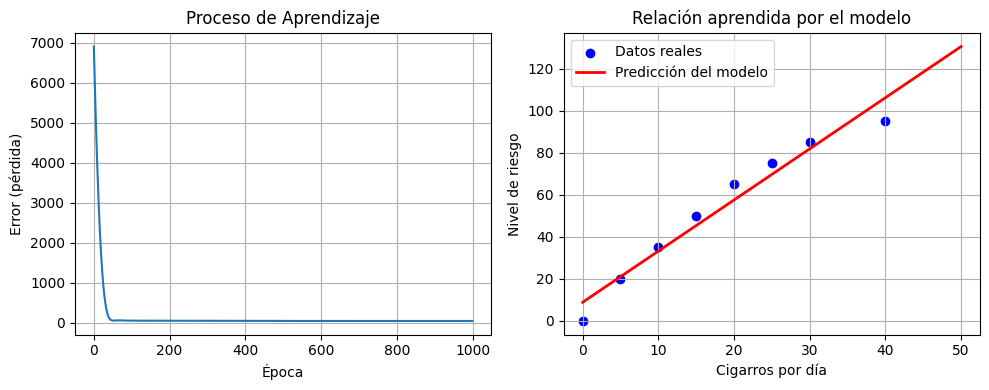

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# === 1. Datos de entrada y salida ===
# Número de cigarros que una persona fuma por día (entrada)
cantidad_cigarros_dia = np.array([0, 5, 10, 15, 20, 25, 30, 40], dtype=float)

# Nivel de riesgo de salud estimado (salida)
nivel_riesgo_salud = np.array([0, 20, 35, 50, 65, 75, 85, 95], dtype=float)

# === 2. Creación del modelo ===
# Un solo nodo que aprende la relación entre cigarros y riesgo
capa_salida = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo_lineal = tf.keras.Sequential([capa_salida])

# === 3. Configuración del aprendizaje ===
modelo_lineal.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)

print("🔹 Iniciando entrenamiento del modelo...\n")

# === 4. Entrenamiento del modelo ===
historial_entrenamiento = modelo_lineal.fit(
    cantidad_cigarros_dia, 
    nivel_riesgo_salud, 
    epochs=1000, 
    verbose=False
)

print("✅ Modelo entrenado exitosamente!\n")

# === 5. Visualización del proceso de aprendizaje ===
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Proceso de Aprendizaje")
plt.xlabel("Época")
plt.ylabel("Error (pérdida)")
plt.plot(historial_entrenamiento.history["loss"])
plt.grid(True)

# === 6. Predicciones con nuevos valores ===
print("=== PREDICCIONES ===\n")

valores_prueba = [0, 10, 20, 35, 50]

for cigarros in valores_prueba:
    prediccion = modelo_lineal.predict(np.array([cigarros]), verbose=0)
    print(f"Cigarros por día: {cigarros:2} → Riesgo estimado: {prediccion[0][0]:.2f}")

# === 7. Mostrar los parámetros aprendidos ===
print("\n=== PARÁMETROS DEL MODELO ===\n")
pesos_y_sesgo = capa_salida.get_weights()
print(f"Peso (pendiente): {pesos_y_sesgo[0][0][0]:.4f}")
print(f"Sesgo (intersección): {pesos_y_sesgo[1][0]:.4f}")

# === 8. Visualización de la línea aprendida ===
plt.subplot(1, 2, 2)
plt.title("Relación aprendida por el modelo")
plt.xlabel("Cigarros por día")
plt.ylabel("Nivel de riesgo")
plt.scatter(cantidad_cigarros_dia, nivel_riesgo_salud, label="Datos reales", color="blue")

# Crear una línea de predicción suave
x_grafico = np.linspace(0, 50, 100)
y_grafico = modelo_lineal.predict(x_grafico, verbose=0)
plt.plot(x_grafico, y_grafico, 'r-', label="Predicción del modelo", linewidth=2)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
